<a href="https://colab.research.google.com/github/Samuela31/Machine-Learning-Lab/blob/main/ML_Lab_4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

PlayTennis = pd.read_csv("enjoysport.csv")
PlayTennis

,Sky,Temp,Humidity,Wind,EnjoySport
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rainy,Mild,High,Weak,Yes
4,Rainy,Cool,Normal,Weak,Yes
5,Rainy,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rainy,Mild,Normal,Weak,Yes


In [ ]:
#to map categorical variables into integers since they can't be directly processed
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

PlayTennis['Sky'] = Le.fit_transform(PlayTennis['Sky'])
PlayTennis['Temp'] = Le.fit_transform(PlayTennis['Temp'])
PlayTennis['Humidity'] = Le.fit_transform(PlayTennis['Humidity'])
PlayTennis['Wind'] = Le.fit_transform(PlayTennis['Wind'])
PlayTennis['EnjoySport'] = Le.fit_transform(PlayTennis['EnjoySport'])

PlayTennis

,Sky,Temp,Humidity,Wind,EnjoySport
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


In [ ]:
y = PlayTennis['EnjoySport'] #output
X = PlayTennis.drop(['EnjoySport'],axis=1) #training data except output

# Fitting the model
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion = 'entropy')
dt = dt.fit(X, y)

[Text(0.4444444444444444, 0.9, 'Sky <= 0.5\nentropy = 0.94\nsamples = 14\nvalue = [5, 9]\nclass = Yes'),
 Text(0.3333333333333333, 0.7, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]\nclass = Yes'),
 Text(0.5555555555555556, 0.7, 'Humidity <= 0.5\nentropy = 1.0\nsamples = 10\nvalue = [5, 5]\nclass = No'),
 Text(0.3333333333333333, 0.5, 'Sky <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]\nclass = No'),
 Text(0.2222222222222222, 0.3, 'Wind <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.1111111111111111, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = No'),
 Text(0.3333333333333333, 0.1, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes'),
 Text(0.4444444444444444, 0.3, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = No'),
 Text(0.7777777777777778, 0.5, 'Wind <= 0.5\nentropy = 0.722\nsamples = 5\nvalue = [1, 4]\nclass = Yes'),
 Text(0.6666666666666666, 0.3, 'Temp <= 1.0\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]\nclass = No'),
 Text(0.5

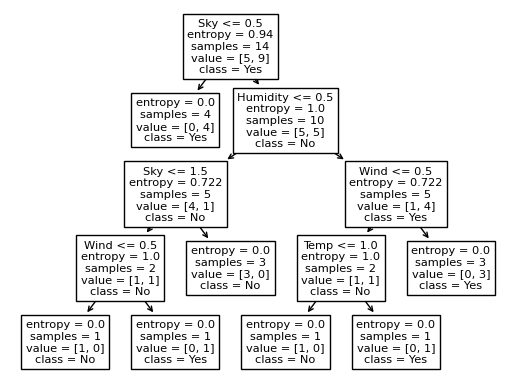

In [ ]:
# We can visualize the tree using tree.plot_tree
tree.plot_tree(dt, feature_names=X.columns, class_names=['No', 'Yes'])

In [ ]:
# The predictions are stored in X_pred
X_pred = dt.predict(X)

# verifying if the model has predicted it all right.
X_pred == y

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
Name: EnjoySport, dtype: bool

In [ ]:
#ID3 algorithm
import math
import pandas as pd
import numpy as np

#Calculate entropy
def entropy(tcol):
    #tvalue is list of target values like no, yes
    #tcount is count of each target value in tvalue from target column tcol (n, p values)
    tvalue, tcount = np.unique(tcol, return_counts=True)

    #finding entropy by adding -(p/(n+p))*log2(p/(p+n)), -(n/(n+p))*log2(n/(p+n))
    #(and other target variables if any which would change denominator) in each iteration
    entropy=0
    for i in range(len(tvalue)):
        entropy +=(-tcount[i]/np.sum(tcount)) * math.log2(tcount[i]/np.sum(tcount))

    return entropy

#Calculate information gain
def info_gain(data, attribute):
    #calculating entropy of entire dataset Entropy(S)
    total_entropy = entropy(data['EnjoySport'])
    print(total_entropy)

    vals, counts = np.unique(data[attribute], return_counts=True)
    weighted_entropy = 0
    for i in range(len(vals)):
      weighted_entropy+=(counts[i]/np.sum(counts))*entropy(data.where(data[attribute]==vals[i]).dropna()['EnjoySport'])

    info_gain = total_entropy - weighted_entropy
    return info_gain

# Define a function to choose the best attribute to split on
def ID3(data, original_data, features, target_attribute_name="class", parent_node_class=None):
    # Base cases:

    # If all target_values have the same value, return this value
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    # If the dataset is empty, return the mode target feature value in the original dataset
    elif len(data) == 0:
        return np.unique(original_data[target_attribute_name])[
            np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])]

    # If the feature space is empty, return the mode target feature value of the direct parent node
    elif len(features) == 0:
        return parent_node_class

    # If none of the above holds true, grow the tree:

    else:
        # Set the default value for this node to be the mode target feature value of the current node
        parent_node_class = np.unique(data[target_attribute_name])[
            np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])]

        # Select the feature with the highest information gain
        best_feature = max(
            features, key=lambda x: info_gain(data, x, target_attribute_name))

        # Create a new decision tree/node with the best feature and add it to the tree
        tree = {best_feature: {}}

        # Remove the feature with the highest information gain from the feature space
        features = [i for i in features if i != best_feature]

        # Grow a branch under the root node for each possible value of the root feature node
        for value in np.unique(data[best_feature]):
            value = value

            # Split the dataset along the value of the feature with the largest information gain and create sub_datasets
            sub_data = data.where(data[best_feature] == value).dropna()

            # Recursively call the ID3 algorithm for each of those sub_datasets with the new parameters
            subtree = ID3(
                sub_data, data, features, target_attribute_name, parent_node_class)

            # Add the sub tree, grown from the sub_dataset to the tree under the root node
            tree[best_feature][value] = subtree

        return tree

#MAIN CODE
#reading dataset
df = pd.read_csv("enjoysport.csv")

#splitting into data and target values
d={}
for col in df.columns:
  if col!='EnjoySport':
    d[col]=list(df[col])

target=list(df['EnjoySport'])
attributes=list(d.keys())
print(d,target,attributes,sep='\n')

tree = id3(d, target, attributes)
print(tree)

{'Sky': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'], 'Temp': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'], 'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'], 'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Weak', 'Weak', 'Strong', 'Strong', 'Weak', 'Strong']}
['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
['Sky', 'Temp', 'Humidity', 'Wind']
{'Sky': {'Overcast': 'Yes', 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}, 'Rainy': {'Wind': {'Weak': 'Yes', 'Strong': 'No'}}}}
